In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
import os
os.chdir(r'/content')

In [4]:
!unzip Jojo_data.zip

Archive:  Jojo_data.zip
replace Jojo_data/Avdol/00000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
path = Path(r'/content/Jojo_data')

In [6]:
np.random.seed(1)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct = 0.2, ds_tfms = get_transforms(do_flip = False), size = 228, bs = 64).normalize(imagenet_stats)

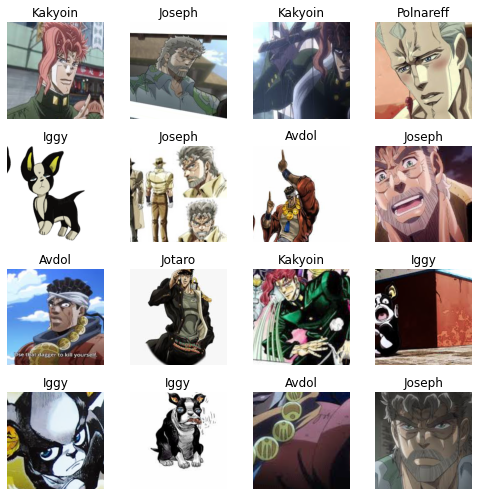

In [7]:
data.show_batch(rows = 4, figsize = (7, 7))

In [8]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.332561,1.741448,0.459184,00:07
1,1.535832,1.014691,0.265306,00:06
2,1.147781,0.801706,0.224490,00:06
3,0.893264,0.775059,0.204082,00:06


In [10]:
learn.save('stage-1')

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


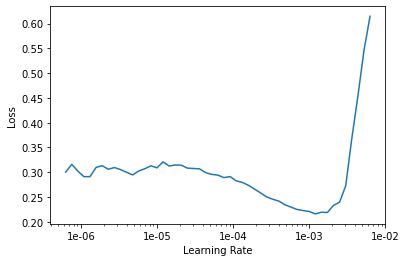

In [13]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(4, max_lr = slice(1e-04, 3e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.343156,1.778157,0.357143,00:07
1,0.514969,1.308827,0.285714,00:06
2,0.492614,1.045559,0.265306,00:07
3,0.422923,0.612569,0.173469,00:07


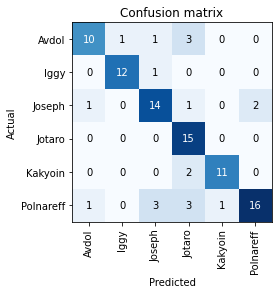

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [57]:
img = open_image(r'/content/6af32952636b69c6b3a3fb115ae1eb43.jpg')

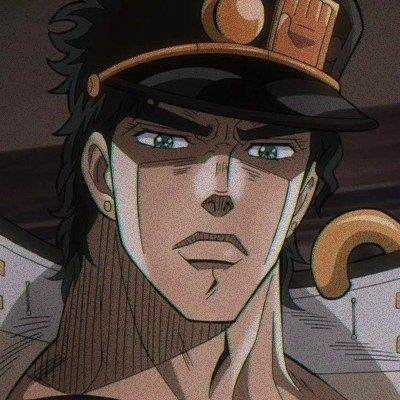

In [58]:
img

In [59]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class.obj

'Jotaro'